In [ ]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory
import sys
import math
import numpy as np
solverpath_folder = "E:\\anaconda\\or_package\\ipopt\\Ipopt-3.11.1-win64-intel13.1\\bin"
solverpath_exe = "E:\\anaconda\\or_package\\ipopt\\Ipopt-3.11.1-win64-intel13.1\\bin\\ipopt.exe"
sys.path.append(solverpath_folder)

we optimize the function with different initial points

In [6]:
x_init=np.arange(0,4.01,0.8)
y_init=np.arange(0,4.01,0.8)
initial_optimum=[]
for i in range(len(x_init)):
    for j in range(len(y_init)):
        model = ConcreteModel()
        model.x = pyo.Var(initialize=x_init[i])
        model.y = pyo.Var(initialize=y_init[j])
        
        x = model.x
        y = model.y
        obj_func=(2-cos(np.pi*x)-cos(np.pi*y))*(x**2)*(y**2)
        model.obj = pyo.Objective(expr= obj_func, sense=minimize)
        opt = SolverFactory('ipopt', executable=solverpath_exe).solve(model)
        min_obj = model.obj()
        x_value = pyo.value(x)
        y_value = pyo.value(y)
        initial_optimum.append([x_init[i],y_init[i],x_value,y_value,min_obj])

In [9]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
df=pd.DataFrame(initial_optimum,columns=["initianl x","initial y", "optimal x","optimal y","minimum f"])
df

,initianl x,initial y,optimal x,optimal y,minimum f
0,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.80,0.00
2,0.00,0.00,0.00,1.60,0.00
3,0.00,0.00,0.00,2.40,0.00
4,0.00,0.00,0.00,3.20,0.00
5,0.00,0.00,0.00,4.00,0.00
6,0.80,0.80,0.80,0.00,0.00
7,0.80,0.80,0.01,0.01,0.00
8,0.80,0.80,-0.00,1.65,0.00
9,0.80,0.80,0.00,2.41,0.00


we can see that the function has multiple local(and global) minimums. so with different initial points, we converge to different local mins.


$cos(\pi x) \leq 1 ,cos(\pi y) \leq 1 \rightarrow (1- cos(\pi x)) + (1-cos(\pi y)) \geq 0 $

$x^2 \geq 0 , y^2 \geq 0$

so $f(x,y)=(2- cos(\pi x)-cos(\pi y))  x^2  y^2 \geq 0$

so $(x^* ,y^*) \in \{ (x,y) | x,y\in Z\} \cup \{ (x,y) | x=0 \vee y=0\}$ and $min(f(x,y))=0$


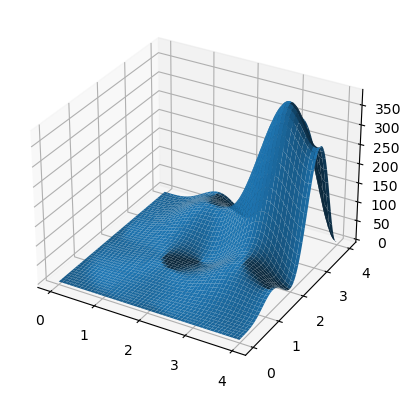

In [65]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(x, y)
z=obj_func(X,Y)
Z = z.reshape(X.shape)
ax.plot_surface(X, Y, Z)

we can see that f has many local(and global mins)